In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-20m.zip',
        tmpdir + '/ml-20m.zip')
    zipfile.ZipFile(tmpdir + '/ml-20m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-20m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-20m/ratings.csv',
    ).rename({
        'userId':'USER_ID', 'movieId':'ITEM_ID', 'timestamp':'TIMESTAMP'
    }, axis=1)

    items = pd.read_csv(
        tmpdir + '/ml-20m/movies.csv',
        encoding='latin1',
    ).rename({
        'movieId':'ITEM_ID'
    }, axis=1)

genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
README.txt
tags.csv



## show data template

In [3]:
interactions.head()

,USER_ID,ITEM_ID,rating,TIMESTAMP
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
items.head()

,ITEM_ID,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## run diagnostics

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
          USER_ID  ITEM_ID  rating   TIMESTAMP
2996241     20304     4674     3.0   998323804
7181269     49523      491     4.0   941391420
6044143     41613     4225     4.0  1018278553
13905963    96050     2798     3.0   974825310
4756436     32659    34405     4.0  1218187716
16433056   113769      163     3.0   834501313
9601618     66427     1320     3.0   867345455
12645739    87401      497     4.0   846926971
12420501    85793     3397     5.0  1011322545
8944481     61825      486     4.0   978540943

=== Interactions table, original shape=(20000263, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (20000263, 4)
duplication rate 0.0
drop_duplicates shape (20000263, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             rating     TIMESTAMP
count  2.000026e+07  2.000026e+07
mean   3.525529e+00  1

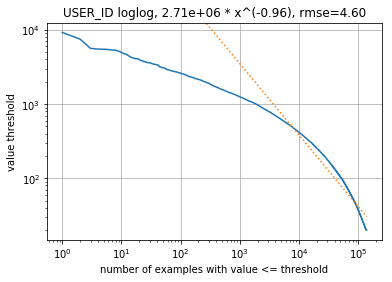


=== ITEM_ID top 10 categories ===
296     67310
356     66172
318     63366
593     63299
480     59715
260     54502
110     53769
589     52244
2571    51334
527     50054
dtype: int64


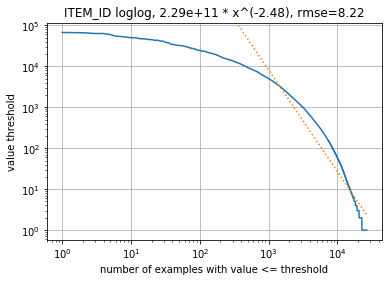


=== Hourly activity pattern ===
0      946689
1      891222
2      893318
3      880206
4      761767
5      693646
6      640515
7      582846
8      552690
9      519421
10     524195
11     546619
12     613826
13     691889
14     786165
15     879910
16     958747
17    1007302
18    1087910
19    1144854
20    1157567
21    1163521
22    1083166
23     992272
dtype: int64

=== Day of week activity pattern ===
0    3114661
1    3084949
2    2865378
3    2696561
4    2710068
5    2626447
6    2902199
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


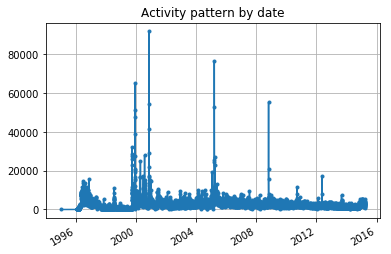

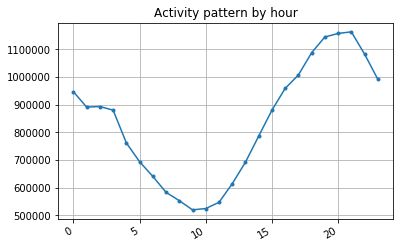

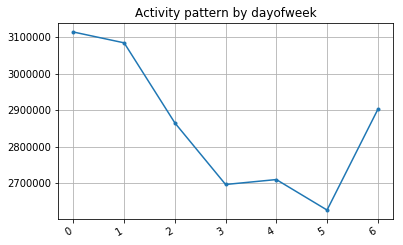


=== Temporal shift analysis ===

temporal out-sample items, freq=5d, hist_len=0, avg_loss=13.5%, time=32.6s
temporal out-sample items, freq=5d, hist_len=1, avg_loss=8.4%, time=27.8s
temporal out-sample items, freq=5d, hist_len=10, avg_loss=1.3%, time=28.9s
temporal out-sample items, freq=5d, hist_len=100, avg_loss=0.4%, time=29.7s
temporal out-sample items, freq=5d, hist_len=1000, avg_loss=0.4%, time=30.6s


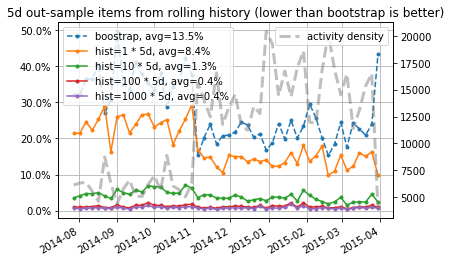

temporal total variation, freq=5d, hist_len=0, avg_loss=30.0%, time=32.4s
temporal total variation, freq=5d, hist_len=1, avg_loss=24.0%, time=28.0s
temporal total variation, freq=5d, hist_len=10, avg_loss=20.7%, time=28.6s
temporal total variation, freq=5d, hist_len=100, avg_loss=25.2%, time=30.0s
temporal total variation, freq=5d, hist_len=1000, avg_loss=38.0%, time=30.2s


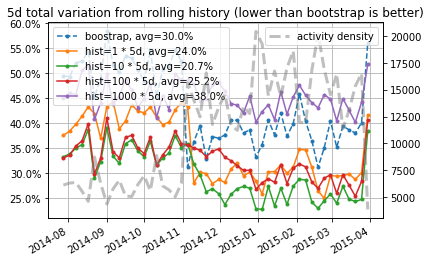

temporal out-sample items, freq=1d, hist_len=0, avg_loss=37.7%, time=37.9s
temporal out-sample items, freq=1d, hist_len=1, avg_loss=27.0%, time=31.3s
temporal out-sample items, freq=1d, hist_len=10, avg_loss=4.5%, time=33.9s
temporal out-sample items, freq=1d, hist_len=100, avg_loss=0.6%, time=38.8s
temporal out-sample items, freq=1d, hist_len=1000, avg_loss=0.2%, time=46.3s


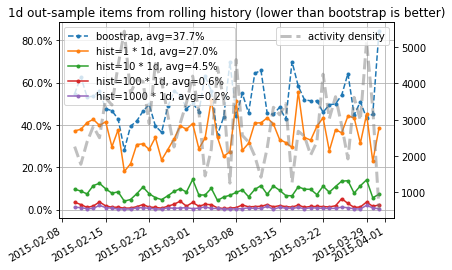

temporal total variation, freq=1d, hist_len=0, avg_loss=51.7%, time=37.7s
temporal total variation, freq=1d, hist_len=1, avg_loss=42.7%, time=31.4s
temporal total variation, freq=1d, hist_len=10, avg_loss=35.3%, time=33.9s
temporal total variation, freq=1d, hist_len=100, avg_loss=36.4%, time=38.9s
temporal total variation, freq=1d, hist_len=1000, avg_loss=41.0%, time=45.7s


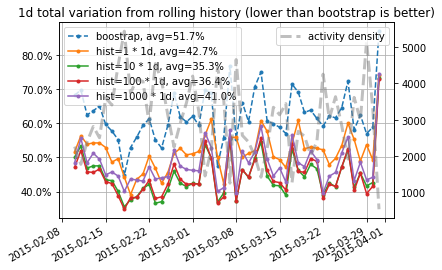

temporal out-sample items, freq=3h, hist_len=0, avg_loss=73.5%, time=44.4s
temporal out-sample items, freq=3h, hist_len=1, avg_loss=64.4%, time=38.0s
temporal out-sample items, freq=3h, hist_len=10, avg_loss=22.5%, time=46.1s
temporal out-sample items, freq=3h, hist_len=100, avg_loss=3.6%, time=75.5s
temporal out-sample items, freq=3h, hist_len=1000, avg_loss=0.5%, time=131.6s


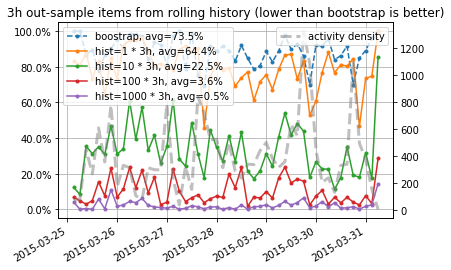

temporal total variation, freq=3h, hist_len=0, avg_loss=78.8%, time=44.5s
temporal total variation, freq=3h, hist_len=1, avg_loss=72.0%, time=37.9s
temporal total variation, freq=3h, hist_len=10, avg_loss=63.1%, time=44.2s
temporal total variation, freq=3h, hist_len=100, avg_loss=62.5%, time=72.2s
temporal total variation, freq=3h, hist_len=1000, avg_loss=63.6%, time=134.5s


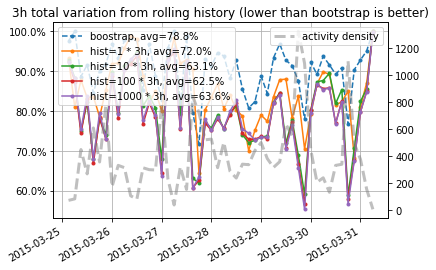


=== session time delta describe ===
count    1.986177e+07
mean     1.184378e+05
std      2.127205e+06
min      0.000000e+00
25%      3.000000e+00
50%      1.100000e+01
75%      3.600000e+01
max      4.645970e+08
Name: TIMESTAMP, dtype: float64


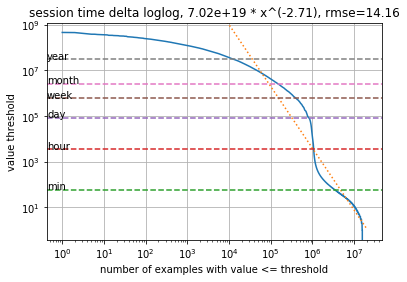

=== user time span describe ===
count    1.384930e+05
mean     1.698559e+07
std      5.423238e+07
min      0.000000e+00
25%      8.980000e+02
50%      3.398000e+03
75%      2.641789e+06
max      5.534154e+08
Name: TIMESTAMP, dtype: float64


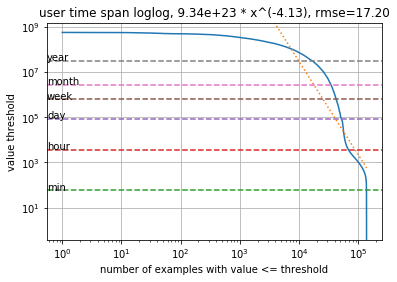

########################################
# USERS TABLE NOT FOUND
########################################
########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
       ITEM_ID                                             title  \
25424   120278                                 Another Me (2013)   
25248   119131                    Water-mirror of Granada (1955)   
14384    72035  Dimensions of Dialogue (Moznosti dialogu) (1982)   
4162      4256                   Center of the World, The (2001)   
11181    47076    Good Morning, Night (Buongiorno, notte) (2003)   
25020   118109                         State of Emergency (2011)   
27024   129881                       Il cappotto di legno (1981)   
9276     27315                   Suzhou River (Suzhou he) (2000)   
15138    77208                                       Skin (2008)   
22725   108791          Noordzee, Texas (North Sea Texas) (2011)   

                         genr

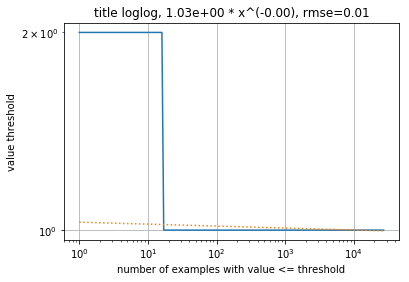


=== genres top 10 categories ===
Drama          13344
Comedy          8374
Thriller        4178
Romance         4127
Action          3520
Crime           2939
Horror          2611
Documentary     2471
Adventure       2329
Sci-Fi          1743
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail title distributions are usually hard to learn (slope=-0.0029748976193251604)!
            Consider rolling up title or dropping its rare values.
            
  """.format(name, slope))


In [5]:
diagnose(interactions, None, items)